# Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [3]:
df = pd.read_csv('Crime_Data_from_2010_to_2019.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119797 entries, 0 to 2119796
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DR_NO,2119797.0,1.480538e+08,2.898578e+07,1.208575e+06,1.214271e+08,1.508126e+08,1.715175e+08,9.102204e+08
TIME OCC,2119797.0,1.359294e+03,6.471747e+02,1.000000e+00,9.300000e+02,1.430000e+03,1.900000e+03,2.359000e+03
AREA,2119797.0,1.108751e+01,6.012365e+00,1.000000e+00,6.000000e+00,1.100000e+01,1.600000e+01,2.100000e+01
Rpt Dist No,2119797.0,1.155139e+03,6.012509e+02,1.000000e+02,6.430000e+02,1.189000e+03,1.668000e+03,2.199000e+03
Part 1-2,2119797.0,1.446631e+00,4.971437e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Crm Cd,2119797.0,5.073721e+02,2.107219e+02,1.100000e+02,3.300000e+02,4.420000e+02,6.260000e+02,9.560000e+02
Vict Age,2119797.0,3.175379e+01,2.064759e+01,-1.100000e+01,2.000000e+01,3.200000e+01,4.600000e+01,1.180000e+02
Premis Cd,2119744.0,3.116512e+02,2.114669e+02,1.010000e+02,1.020000e+02,2.100000e+02,5.010000e+02,9.710000e+02
Weapon Used Cd,712365.0,3.714527e+02,1.133504e+02,1.010000e+02,4.000000e+02,4.000000e+02,4.000000e+02,5.160000e+02
Crm Cd 1,2119787.0,5.071943e+02,2.105824e+02,1.100000e+02,3.300000e+02,4.420000e+02,6.260000e+02,9.990000e+02


# Data Cleaning

In [6]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 28 columns and 2119797 Rows.
There are 13 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Crm Cd 4,0,2119692,100.0,2119692,100.0,float64
Crm Cd 3,0,2116256,99.8,2116256,99.8,float64
Crm Cd 2,0,1979263,93.4,1979263,93.4,float64
Cross Street,0,1764202,83.2,1764202,83.2,object
Weapon Desc,0,1407433,66.4,1407433,66.4,object
Weapon Used Cd,0,1407432,66.4,1407432,66.4,float64
Mocodes,0,228261,10.8,228261,10.8,object
Vict Descent,0,196812,9.3,196812,9.3,object
Vict Sex,0,196766,9.3,196766,9.3,object
Premis Desc,0,187,0.0,187,0.0,object


<Axes: >

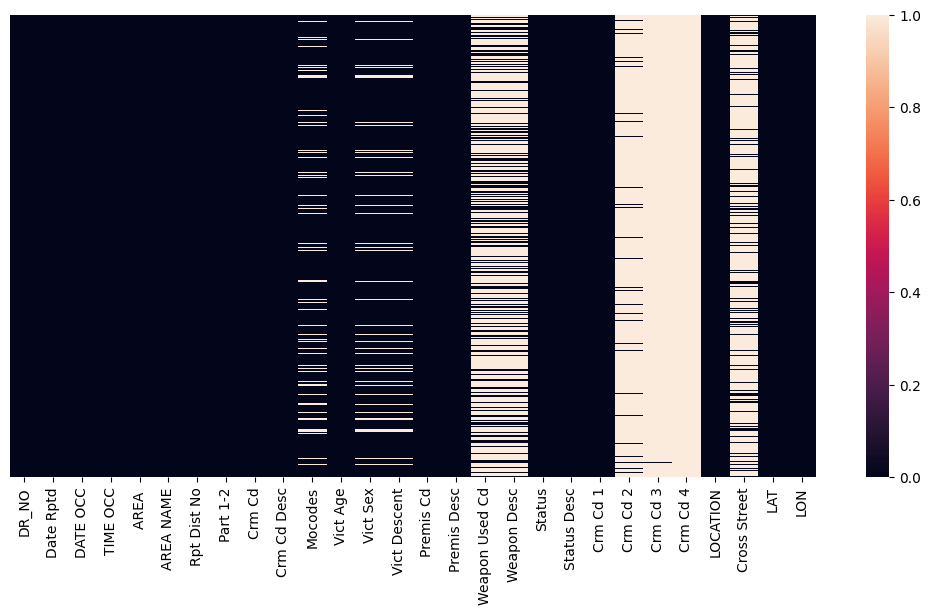

In [7]:
figure = plt.figure(figsize=(13,6))
sns.heatmap(df.isnull(),yticklabels='')

In [8]:
df.drop(['Cross Street', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Weapon Used Cd', 'Weapon Desc'], axis=1, inplace = True)

In [9]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,M,H,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,900.0,300 E GAGE AV,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,M,W,101.0,STREET,IC,Invest Cont,740.0,SEPULVEDA BL,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,M,H,103.0,ALLEY,IC,Invest Cont,946.0,1300 E 21ST ST,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,F,W,101.0,STREET,IC,Invest Cont,900.0,CAHUENGA BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,F,H,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488


In [14]:
print(df)

             DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0          1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM      1350   
1         11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM        45   
2         70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM      1515   
3         90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM       150   
4        100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM      2100   
...            ...                     ...                     ...       ...   
2119792  190506304  02/22/2019 12:00:00 AM  02/22/2019 12:00:00 AM       840   
2119793  190608903  03/28/2019 12:00:00 AM  03/28/2019 12:00:00 AM       400   
2119794  192004409  01/06/2019 12:00:00 AM  01/06/2019 12:00:00 AM      2100   
2119795  191716777  10/17/2019 12:00:00 AM  10/16/2019 12:00:00 AM      1800   
2119796  190805435  02/01/2019 12:00:00 AM  02/01/2019 12:00:00 AM      1615   

         AREA    AREA NAME  Rpt Dist No

# Data Selection

## Vizualising neighborhood wise crime rate

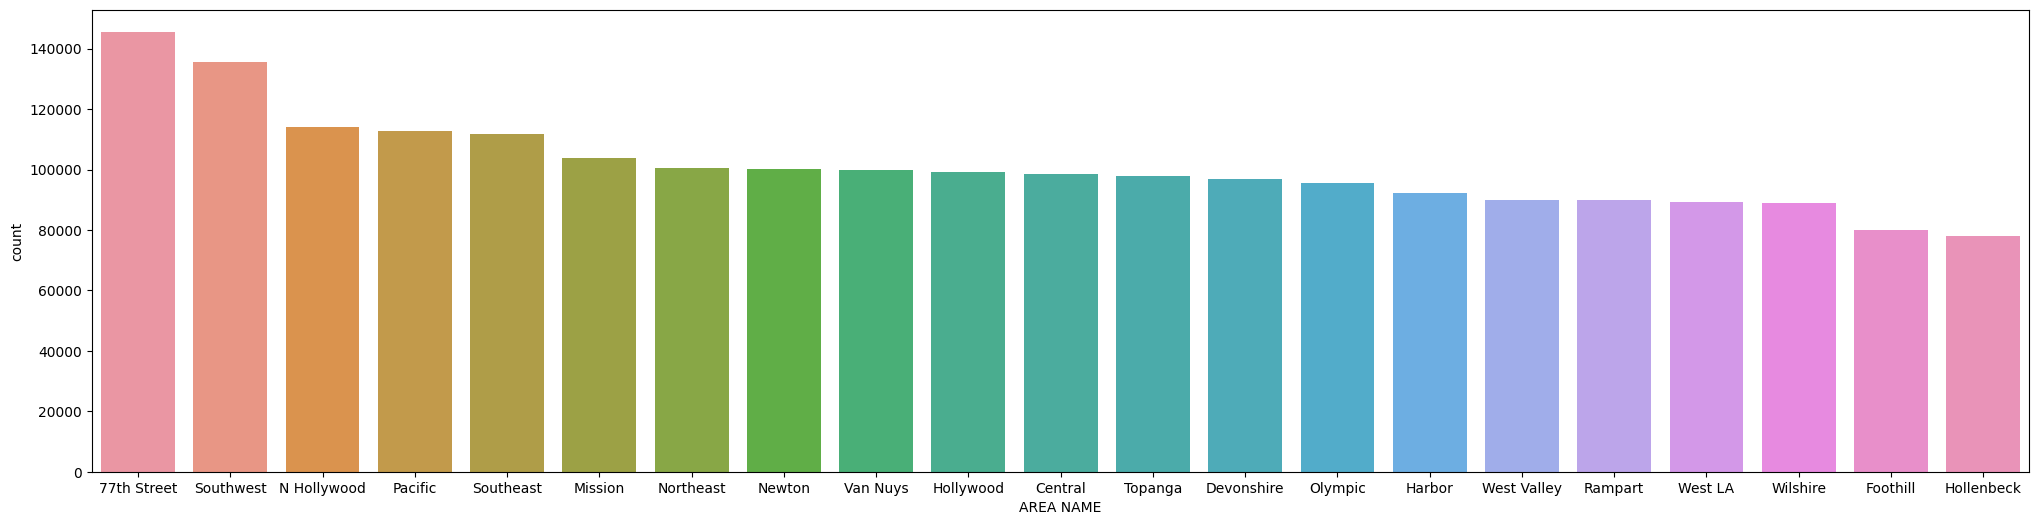

In [43]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.countplot(data=df, x='AREA NAME', order=df['AREA NAME'].value_counts().index, ax=ax)
plt.savefig('area_vs_count.png')

# Filtering out relevant crimes

In [57]:
temp = df.filter(['Crm Cd', 'Crm Cd Desc'])
temp = temp.drop_duplicates()
temp.to_csv('crimes.csv', index=False)

In [58]:
df = df[~df['Crm Cd'].isin([900, 740, 946, 442, 237, 236, 626, 745, 343,
649,
623,
886,
901,
354,
231,
813,
821,
928,
664,
662,
902,
668,
940,
670,
660,
434,
653,
661,
806,
443,
437,
345,
438,
654,
651,
903,
944,
622,
666,
880,
439,
487,
954,
890,
472,
840,
942,
951,
950,
470,
870,
444,
471,
652,
948,
884,
814,
952,
830,
445,
926,
432])]
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,F,H,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488
6,100100508,01/08/2010 12:00:00 AM,01/07/2010 12:00:00 AM,2005,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,M,H,101.0,STREET,IC,Invest Cont,330.0,PICO BL,34.0389,-118.2643
7,100100509,01/09/2010 12:00:00 AM,01/08/2010 12:00:00 AM,2100,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,M,B,710.0,OTHER PREMISE,AA,Adult Arrest,230.0,500 CROCKER ST,34.0435,-118.2427
8,100100510,01/09/2010 12:00:00 AM,01/09/2010 12:00:00 AM,230,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,M,H,108.0,PARKING LOT,IC,Invest Cont,230.0,800 W OLYMPIC BL,34.0450,-118.2640
9,100100511,01/09/2010 12:00:00 AM,01/06/2010 12:00:00 AM,2100,1,Central,132,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,M,W,710.0,OTHER PREMISE,IC,Invest Cont,341.0,200 S OLIVE ST,34.0538,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119792,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,F,W,109.0,PARK/PLAYGROUND,AO,Adult Other,627.0,100 W 22ND ST,33.7257,-118.2801
2119793,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,X,X,706.0,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,IC,Invest Cont,648.0,1400 N LA BREA AV,34.0962,-118.3490
2119794,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,F,B,102.0,SIDEWALK,IC,Invest Cont,930.0,6TH,34.0637,-118.2870
2119795,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,NaN,101.0,STREET,IC,Invest Cont,420.0,17200 NAPA ST,34.2266,-118.5085


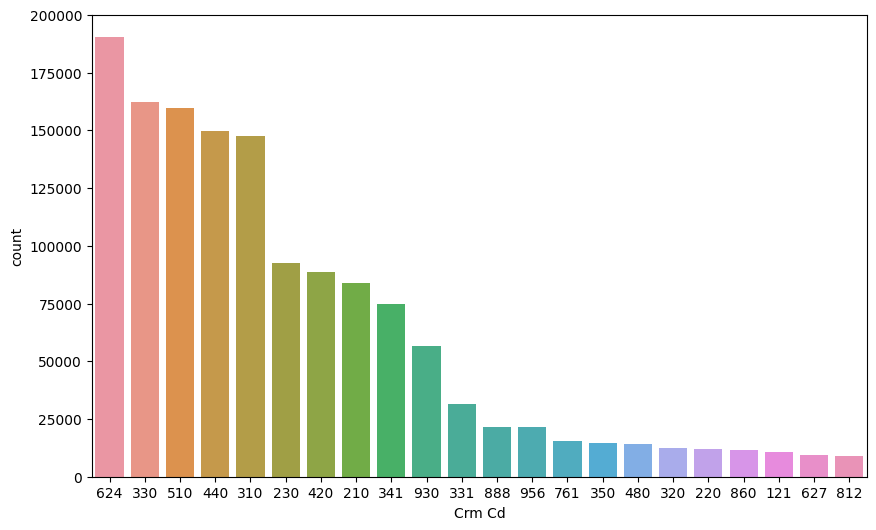

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='Crm Cd', order=df['Crm Cd'].value_counts().iloc[:22].index, ax=ax)
plt.savefig('crime_vs_count.png')

In [75]:
crime_filtered_df = df[df['Crm Cd'].isin([624,330,510,440,310,230,420,210,341,930,331,888,956,761,350,480,320,220,860,121,627,812])]
crime_filtered_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
6,100100508,01/08/2010 12:00:00 AM,01/07/2010 12:00:00 AM,2005,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,M,H,101.0,STREET,IC,Invest Cont,330.0,PICO BL,34.0389,-118.2643
7,100100509,01/09/2010 12:00:00 AM,01/08/2010 12:00:00 AM,2100,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,M,B,710.0,OTHER PREMISE,AA,Adult Arrest,230.0,500 CROCKER ST,34.0435,-118.2427
8,100100510,01/09/2010 12:00:00 AM,01/09/2010 12:00:00 AM,230,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,M,H,108.0,PARKING LOT,IC,Invest Cont,230.0,800 W OLYMPIC BL,34.0450,-118.2640
9,100100511,01/09/2010 12:00:00 AM,01/06/2010 12:00:00 AM,2100,1,Central,132,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,M,W,710.0,OTHER PREMISE,IC,Invest Cont,341.0,200 S OLIVE ST,34.0538,-118.2488
10,100100521,01/14/2010 12:00:00 AM,01/14/2010 12:00:00 AM,1445,1,Central,118,2,624,BATTERY - SIMPLE ASSAULT,...,F,B,101.0,STREET,IC,Invest Cont,624.0,900 N BROADWAY,34.0640,-118.2375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119791,190906699,02/24/2019 12:00:00 AM,02/23/2019 12:00:00 AM,2220,9,Van Nuys,904,1,210,ROBBERY,...,F,W,101.0,STREET,IC,Invest Cont,210.0,7600 WILLIS AV,34.2085,-118.4553
2119792,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,F,W,109.0,PARK/PLAYGROUND,AO,Adult Other,627.0,100 W 22ND ST,33.7257,-118.2801
2119794,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,F,B,102.0,SIDEWALK,IC,Invest Cont,930.0,6TH,34.0637,-118.2870
2119795,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,NaN,101.0,STREET,IC,Invest Cont,420.0,17200 NAPA ST,34.2266,-118.5085


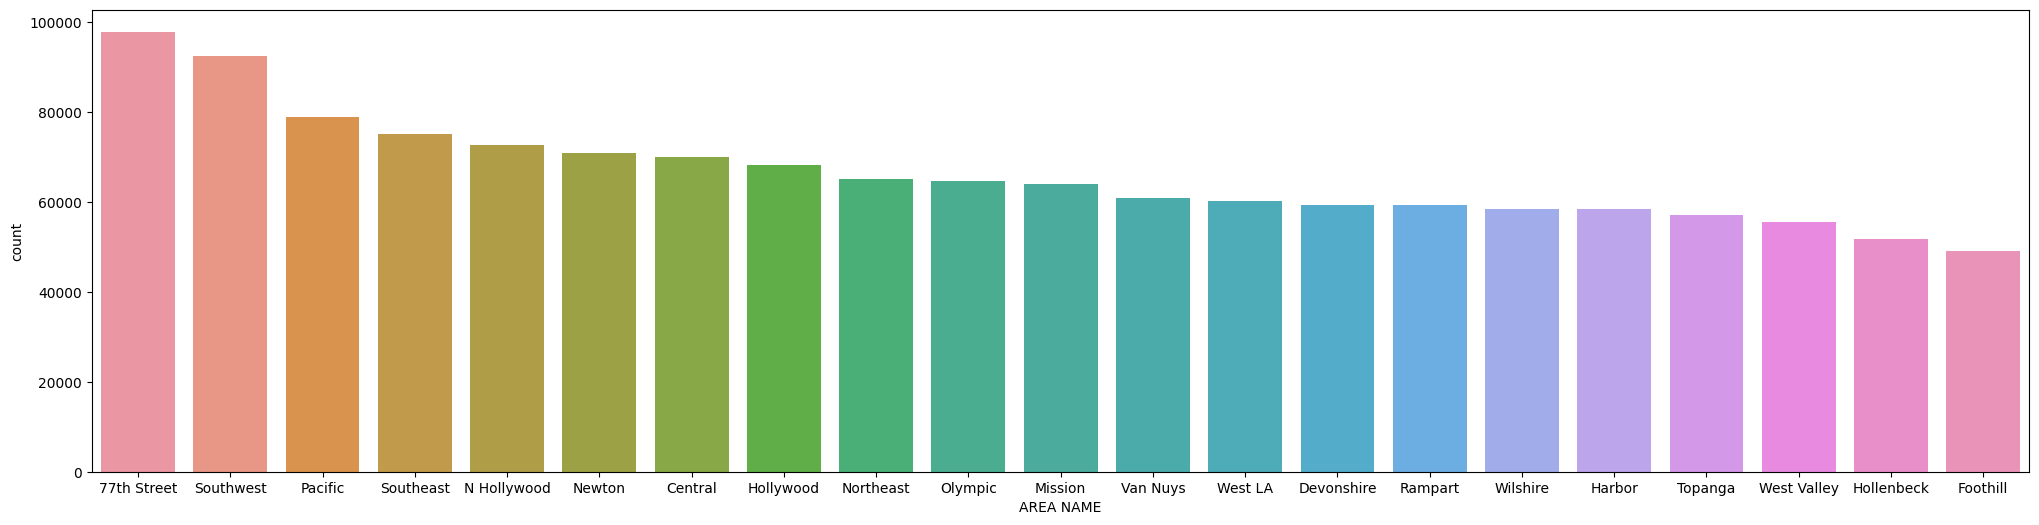

In [81]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.countplot(data=crime_filtered_df, x='AREA NAME', order=crime_filtered_df['AREA NAME'].value_counts().index, ax=ax)
plt.savefig('area_vs_count.png')

In [87]:
crime_filtered_df['DATE OCC'] = pd.to_datetime(crime_filtered_df['DATE OCC'])
crime_filtered_df['Year'] = crime_filtered_df['DATE OCC'].dt.year
crime_filtered_df['Month'] = crime_filtered_df['DATE OCC'].dt.month
crime_filtered_df['Day'] = crime_filtered_df['DATE OCC'].dt.strftime('%A')

/var/folders/w2/mtjt_bn16bz5gtb62qdtm3s40000gn/T/ipykernel_12980/1909824122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_filtered_df['DATE OCC'] = pd.to_datetime(crime_filtered_df['DATE OCC'])
/var/folders/w2/mtjt_bn16bz5gtb62qdtm3s40000gn/T/ipykernel_12980/1909824122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_filtered_df['Year'] = crime_filtered_df['DATE OCC'].dt.year
/var/folders/w2/mtjt_bn16bz5gtb62qdtm3s40000gn/T/ipykernel_12980/1909824122.py:3: SettingWithCopyWarning: 
A val

In [88]:
crime_filtered_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month,Day
6,100100508,01/08/2010 12:00:00 AM,2010-01-07,2005,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,STREET,IC,Invest Cont,330.0,PICO BL,34.0389,-118.2643,2010,1,Thursday
7,100100509,01/09/2010 12:00:00 AM,2010-01-08,2100,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,OTHER PREMISE,AA,Adult Arrest,230.0,500 CROCKER ST,34.0435,-118.2427,2010,1,Friday
8,100100510,01/09/2010 12:00:00 AM,2010-01-09,230,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,PARKING LOT,IC,Invest Cont,230.0,800 W OLYMPIC BL,34.0450,-118.2640,2010,1,Saturday
9,100100511,01/09/2010 12:00:00 AM,2010-01-06,2100,1,Central,132,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,OTHER PREMISE,IC,Invest Cont,341.0,200 S OLIVE ST,34.0538,-118.2488,2010,1,Wednesday
10,100100521,01/14/2010 12:00:00 AM,2010-01-14,1445,1,Central,118,2,624,BATTERY - SIMPLE ASSAULT,...,STREET,IC,Invest Cont,624.0,900 N BROADWAY,34.0640,-118.2375,2010,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119791,190906699,02/24/2019 12:00:00 AM,2019-02-23,2220,9,Van Nuys,904,1,210,ROBBERY,...,STREET,IC,Invest Cont,210.0,7600 WILLIS AV,34.2085,-118.4553,2019,2,Saturday
2119792,190506304,02/22/2019 12:00:00 AM,2019-02-22,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,PARK/PLAYGROUND,AO,Adult Other,627.0,100 W 22ND ST,33.7257,-118.2801,2019,2,Friday
2119794,192004409,01/06/2019 12:00:00 AM,2019-01-06,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,SIDEWALK,IC,Invest Cont,930.0,6TH,34.0637,-118.2870,2019,1,Sunday
2119795,191716777,10/17/2019 12:00:00 AM,2019-10-16,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,STREET,IC,Invest Cont,420.0,17200 NAPA ST,34.2266,-118.5085,2019,10,Wednesday


# Temporal Analysis

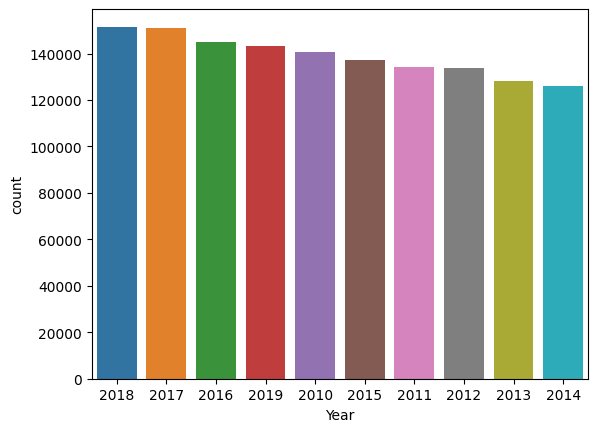

In [93]:
sns.countplot(data=crime_filtered_df, x='Year', order=crime_filtered_df['Year'].value_counts().index)
plt.savefig('year_vs_count.png')

# Spatial Analysis

In [124]:
heatmap_data = crime_filtered_df.groupby(['LAT', 'LON']).size().to_frame('count').reset_index().pivot('LAT', 'LON', 'count')
#sns.heatmap(heatmap_data)

/var/folders/w2/mtjt_bn16bz5gtb62qdtm3s40000gn/T/ipykernel_12980/3101062960.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = crime_filtered_df.groupby(['LAT', 'LON']).size().to_frame('count').reset_index().pivot('LAT', 'LON', 'count')


<Axes: xlabel='LON', ylabel='LAT'>

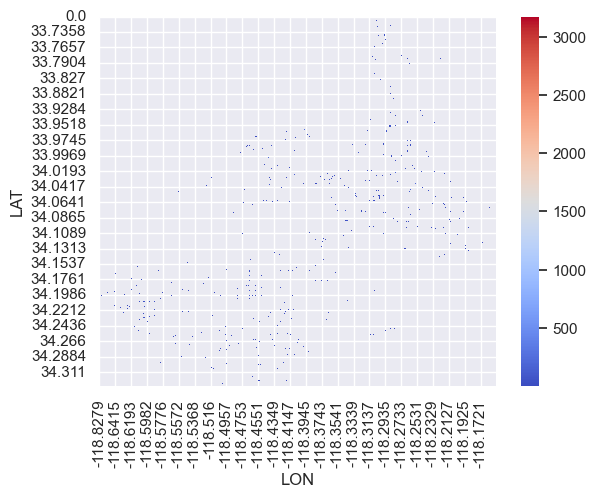

In [131]:
sns.heatmap(heatmap_data, cmap="coolwarm")

In [122]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(heatmap_data)

Your selected dataframe has 5047 columns and 5353 Rows.
There are 5047 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
LON,,,,,,
-118.8279,0,5352,100.0,5352,100.0,float64
-118.5267,0,5352,100.0,5352,100.0,float64
-118.5275,0,5352,100.0,5352,100.0,float64
-118.5280,0,5352,100.0,5352,100.0,float64
-118.5310,0,5352,100.0,5352,100.0,float64
...,...,...,...,...,...,...
-118.2915,0,5222,97.6,5222,97.6,float64
-118.2652,0,5217,97.5,5217,97.5,float64
-118.2916,0,5202,97.2,5202,97.2,float64


<Axes: xlabel='LON', ylabel='LAT'>

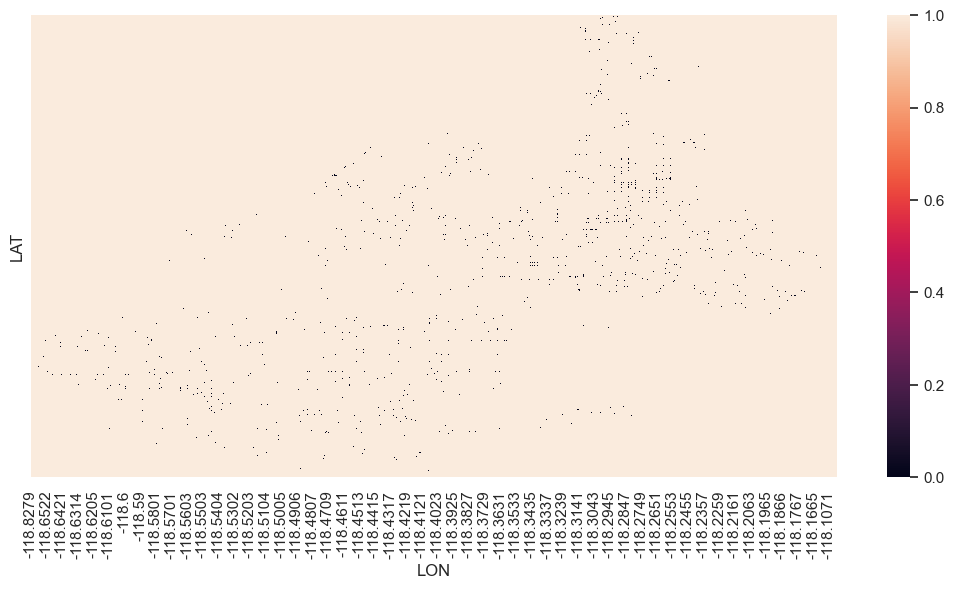

In [123]:
figure = plt.figure(figsize=(13,6))
sns.heatmap(heatmap_data.isnull(),yticklabels='')